In [1]:
from datetime import datetime
from time import sleep
import requests
import numpy as np

In [2]:
def t2s(the_time):
    return datetime.fromtimestamp(int(the_time)).strftime('%Y/%m/%d %H:%M')

# MySQL のデータを確認

In [3]:
import mysql.connector

cnt = mysql.connector.connect(
    host='localhost',
    port='3306',
    db='bitmex',
    user='bitmex',
    password='bitmex',
    charset='utf8'
)

cur = cnt.cursor()

In [4]:
sql = "select t from xbtusd_1m order by t asc"
cur.execute(sql)
data = cur.fetchall()

In [5]:
last_bar = None
for bar in data:
    if int(bar[0]) % (60*60*24) == 0: # 0:00
        day_frame = t2s(int(bar[0]))
    if last_bar == None:
        continue
    if int(bar[0])-int(last_bar[0]) != 60:
        print( "Error in the day of {}".format(day_frame))


## 最後のデータの確認

In [6]:
sql = "select * from xbtusd_1m order by t desc limit 1"
cur.execute(sql)
data = cur.fetchall()
db_last_t = data[0][0]
print(t2s(db_last_t), data[0])

2018/06/06 07:44 (1528238640, 7625.5, 7629.0, 7625.5, 7629.0, 2289101)


## 最後のデータから現在までのデータを取得

In [7]:
data = []
num = 1440 - 1 # 60*24 - 1

last_time = int(datetime.now().strftime('%s'))
start_time = int(db_last_t) + 1

print("Current Time: ", t2s(last_time))

for frame_stime in range(start_time, last_time, 60*60*24):
    frame_etime = frame_stime + 60*num
    if frame_etime > last_time:
        frame_etime = last_time - 60*2 # for safety
    print( "Fetching data for {} - {}".format(t2s(frame_stime), t2s(frame_etime)) )

    com = "https://www.bitmex.com/api/udf/history?symbol=XBTUSD&resolution=1&from={0:}&to={1:}".format(frame_stime, frame_etime)
    ret = requests.get(com)
    
    d = ret.json()
    if d['s'] != 'ok':
        print("Failed for the time frame ({} - {})".format(frame_stime, frame_etime))
    dd = list(zip(d['t'], d['o'], d['h'], d['l'], d['c'], d['v']))
    data.extend(dd)
    
    sleep(5)

Current Time:  2019/01/12 21:41
Fetching data for 2018/06/06 07:44 - 2018/06/07 07:43
Fetching data for 2018/06/07 07:44 - 2018/06/08 07:43
Fetching data for 2018/06/08 07:44 - 2018/06/09 07:43
Fetching data for 2018/06/09 07:44 - 2018/06/10 07:43
Fetching data for 2018/06/10 07:44 - 2018/06/11 07:43
Fetching data for 2018/06/11 07:44 - 2018/06/12 07:43
Fetching data for 2018/06/12 07:44 - 2018/06/13 07:43
Fetching data for 2018/06/13 07:44 - 2018/06/14 07:43
Fetching data for 2018/06/14 07:44 - 2018/06/15 07:43
Fetching data for 2018/06/15 07:44 - 2018/06/16 07:43
Fetching data for 2018/06/16 07:44 - 2018/06/17 07:43
Fetching data for 2018/06/17 07:44 - 2018/06/18 07:43
Fetching data for 2018/06/18 07:44 - 2018/06/19 07:43
Fetching data for 2018/06/19 07:44 - 2018/06/20 07:43
Fetching data for 2018/06/20 07:44 - 2018/06/21 07:43
Fetching data for 2018/06/21 07:44 - 2018/06/22 07:43
Fetching data for 2018/06/22 07:44 - 2018/06/23 07:43
Fetching data for 2018/06/23 07:44 - 2018/06/24 07

Fetching data for 2018/11/05 07:44 - 2018/11/06 07:43
Fetching data for 2018/11/06 07:44 - 2018/11/07 07:43
Fetching data for 2018/11/07 07:44 - 2018/11/08 07:43
Fetching data for 2018/11/08 07:44 - 2018/11/09 07:43
Fetching data for 2018/11/09 07:44 - 2018/11/10 07:43
Fetching data for 2018/11/10 07:44 - 2018/11/11 07:43
Fetching data for 2018/11/11 07:44 - 2018/11/12 07:43
Fetching data for 2018/11/12 07:44 - 2018/11/13 07:43
Fetching data for 2018/11/13 07:44 - 2018/11/14 07:43
Fetching data for 2018/11/14 07:44 - 2018/11/15 07:43
Fetching data for 2018/11/15 07:44 - 2018/11/16 07:43
Fetching data for 2018/11/16 07:44 - 2018/11/17 07:43
Fetching data for 2018/11/17 07:44 - 2018/11/18 07:43
Fetching data for 2018/11/18 07:44 - 2018/11/19 07:43
Fetching data for 2018/11/19 07:44 - 2018/11/20 07:43
Fetching data for 2018/11/20 07:44 - 2018/11/21 07:43
Fetching data for 2018/11/21 07:44 - 2018/11/22 07:43
Fetching data for 2018/11/22 07:44 - 2018/11/23 07:43
Fetching data for 2018/11/23

In [8]:
data

[(1528238640, 7625.5, 7629, 7625.5, 7629, 2289101),
 (1528238700, 7629, 7629, 7628.5, 7628.5, 377105),
 (1528238760, 7628.5, 7629, 7628.5, 7628.5, 795416),
 (1528238820, 7628.5, 7628.5, 7625, 7625, 1055193),
 (1528238880, 7625, 7625.5, 7623, 7623.5, 904223),
 (1528238940, 7623.5, 7623, 7620.5, 7620.5, 319927),
 (1528239000, 7620.5, 7621, 7620.5, 7620.5, 270588),
 (1528239060, 7620.5, 7621, 7620.5, 7620.5, 68532),
 (1528239120, 7620.5, 7621, 7620.5, 7620.5, 228332),
 (1528239180, 7620.5, 7621, 7620.5, 7620.5, 66071),
 (1528239240, 7620.5, 7621, 7620.5, 7620.5, 19838),
 (1528239300, 7620.5, 7623.5, 7620.5, 7623.5, 585358),
 (1528239360, 7623.5, 7624, 7623, 7623.5, 246570),
 (1528239420, 7623.5, 7628, 7623.5, 7627.5, 618930),
 (1528239480, 7627.5, 7629, 7627.5, 7628.5, 954336),
 (1528239540, 7628.5, 7632, 7628.5, 7632, 1606530),
 (1528239600, 7632, 7632, 7631.5, 7632, 1563947),
 (1528239660, 7632, 7632, 7631.5, 7631.5, 364393),
 (1528239720, 7631.5, 7632, 7631.5, 7632, 670710),
 (15282397

## 取得したデータをDBに追加

### 重複しているデータをDBから削除

In [9]:
start_time = data[0][0]
sql = 'delete from xbtusd_1m where t >= {}'.format(start_time)
cur.execute(sql)
cnt.commit()

### 取得したデータをDBに追加

In [10]:
sql = 'insert into xbtusd_1m values (%s, %s, %s, %s, %s, %s)'
#cur.executemany(sql, data)
#cnt.commit()

step = 10000
for i in range(0, len(data), step):
    j = i + step 
    if j > len(data):
        j = len(data)
    print(i,j)
    cur.executemany(sql, data[i:j])
    cnt.commit()
    

0 10000
10000 20000
20000 30000
30000 40000
40000 50000
50000 60000
60000 70000
70000 80000
80000 90000
90000 100000
100000 110000
110000 120000
120000 130000
130000 140000
140000 150000
150000 160000
160000 170000
170000 180000
180000 190000
190000 200000
200000 210000
210000 220000
220000 230000
230000 240000
240000 250000
250000 260000
260000 270000
270000 280000
280000 290000
290000 300000
300000 310000
310000 317636


# データの確認

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
sql = "select t,c from xbtusd_1m where t >= {}".format(data[0][0])
cur.execute(sql)
ret = cur.fetchall()

In [13]:
data

[(1528238640, 7625.5, 7629, 7625.5, 7629, 2289101),
 (1528238700, 7629, 7629, 7628.5, 7628.5, 377105),
 (1528238760, 7628.5, 7629, 7628.5, 7628.5, 795416),
 (1528238820, 7628.5, 7628.5, 7625, 7625, 1055193),
 (1528238880, 7625, 7625.5, 7623, 7623.5, 904223),
 (1528238940, 7623.5, 7623, 7620.5, 7620.5, 319927),
 (1528239000, 7620.5, 7621, 7620.5, 7620.5, 270588),
 (1528239060, 7620.5, 7621, 7620.5, 7620.5, 68532),
 (1528239120, 7620.5, 7621, 7620.5, 7620.5, 228332),
 (1528239180, 7620.5, 7621, 7620.5, 7620.5, 66071),
 (1528239240, 7620.5, 7621, 7620.5, 7620.5, 19838),
 (1528239300, 7620.5, 7623.5, 7620.5, 7623.5, 585358),
 (1528239360, 7623.5, 7624, 7623, 7623.5, 246570),
 (1528239420, 7623.5, 7628, 7623.5, 7627.5, 618930),
 (1528239480, 7627.5, 7629, 7627.5, 7628.5, 954336),
 (1528239540, 7628.5, 7632, 7628.5, 7632, 1606530),
 (1528239600, 7632, 7632, 7631.5, 7632, 1563947),
 (1528239660, 7632, 7632, 7631.5, 7631.5, 364393),
 (1528239720, 7631.5, 7632, 7631.5, 7632, 670710),
 (15282397

In [14]:
t = list(zip(*ret))

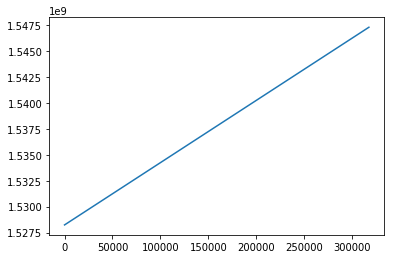

In [15]:
plt.plot(t[0])

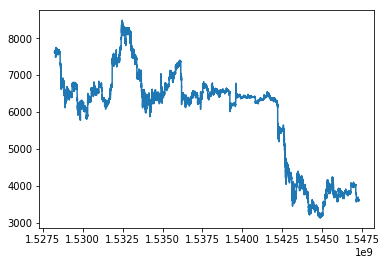

In [16]:
plt.plot(t[0],t[1])